<b>An Exploratory Analysis of 1 Month of Kickstarter Data</b>

Raising money for a project is easier than ever with crowdfunding platforms. Kickstarter is a popular platform for creative projects, and one that I have had my students use as inspiration for entrepreneurial projects in my classes.

In this exploratory analysis, let's look at one month of activities and results on the Kickstarter platform. In this case, we will explore data that was collected via web scraping From November 15 to December 13, 2018 by Web Robots (https://webrobots.io/kickstarter-datasets/).

The main questions we will explore through this analysis are:

1. Where are the people who create Kickstarter projects located?
2. How many projects are typically successful, meaning they have met their goal, for the month?
3. To what extent were the projects promoted by the Kickstarter staff?
3. How many backers does a project attract?
4. How do the number of backers, the goal amount, and pledged amount compare?

This analysis will conclude with suggestions for future research.

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [239]:
df = pd.read_csv('/Users/roxyallen/Downloads/Kickstarter_2018-12-13T03_20_05_701Z/Kickstarter.csv')

In [3]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,170,A documentary about two circuses in remote cor...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",27455,US,1339525842,"{""id"":1596438170,""name"":""Susan Gray"",""is_regis...",USD,$,True,...,big-top-without-borders,https://www.kickstarter.com/discover/categorie...,True,False,successful,1353256231,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",27455.55,international
1,10,A multi-media IPad book telling the true story...,"{""id"":46,""name"":""Children's Books"",""slug"":""pub...",535,US,1351941026,"{""id"":529454320,""name"":""Barb Buresh"",""is_regis...",USD,$,True,...,the-story-of-pweep-from-egg-to-peacock,https://www.kickstarter.com/discover/categorie...,True,False,successful,1355949546,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",535.00,international
2,0,We are college students that get drunk and the...,"{""id"":357,""name"":""Audio"",""slug"":""journalism/au...",0,CA,1415917256,"{""id"":1626740608,""name"":""DC Radio"",""is_registe...",CAD,$,True,...,dc-radio,https://www.kickstarter.com/discover/categorie...,False,False,failed,1418916015,0.886698,"{""web"":{""project"":""https://www.kickstarter.com...",0.00,domestic
3,0,"its Ali bangerz,its time to stand up for other...","{""id"":44,""name"":""World Music"",""slug"":""music/wo...",0,US,1446664703,"{""id"":631293879,""name"":""Ali Bangerz"",""is_regis...",USD,$,True,...,ali-bangerz-two-new-full-lenght-albums,https://www.kickstarter.com/discover/categorie...,False,False,failed,1449345000,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.00,domestic
4,62,A young neuroscientist attempts to reconnect w...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",6705,US,1284003536,"{""id"":1385040366,""name"":""Alexis Gambis (delete...",USD,$,True,...,deja-vu-dissecting-memory-on-camera,https://www.kickstarter.com/discover/categorie...,True,True,successful,1287200724,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",6705.00,international


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811 entries, 0 to 3810
Data columns (total 37 columns):
backers_count               3811 non-null int64
blurb                       3810 non-null object
category                    3811 non-null object
converted_pledged_amount    3811 non-null int64
country                     3811 non-null object
created_at                  3811 non-null int64
creator                     3811 non-null object
currency                    3811 non-null object
currency_symbol             3811 non-null object
currency_trailing_code      3811 non-null bool
current_currency            3811 non-null object
deadline                    3811 non-null int64
disable_communication       3811 non-null bool
friends                     2 non-null object
fx_rate                     3811 non-null float64
goal                        3811 non-null float64
id                          3811 non-null int64
is_backing                  2 non-null object
is_starrable            

In [168]:
df.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,3811.000000,3.811000e+03,3.811000e+03,3.811000e+03,3811.000000,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3.811000e+03,3811.000000,3.811000e+03
mean,167.925216,1.103102e+04,1.414847e+09,1.421211e+09,0.987995,5.056321e+04,1.068813e+09,1.418251e+09,1.190285e+04,1.421027e+09,1.009844,1.104586e+04
std,963.958071,6.703921e+04,6.956082e+07,6.976052e+07,0.173450,7.553509e+05,6.181413e+08,6.988289e+07,6.689274e+04,6.959901e+07,0.206783,6.695454e+04
min,0.000000,0.000000e+00,1.243643e+09,1.245544e+09,0.008813,1.000000e+00,1.852000e+04,1.243658e+09,0.000000e+00,1.245545e+09,0.008786,0.000000e+00
25%,2.000000,3.600000e+01,1.362420e+09,1.371591e+09,1.000000,1.750000e+03,5.325069e+08,1.368624e+09,3.714500e+01,1.371591e+09,1.000000,3.600000e+01
50%,20.000000,1.130000e+03,1.421433e+09,1.427171e+09,1.000000,5.000000e+03,1.063140e+09,1.424280e+09,1.128000e+03,1.426979e+09,1.000000,1.135041e+03
75%,73.000000,5.459500e+03,1.465297e+09,1.471640e+09,1.000000,1.500000e+04,1.604272e+09,1.469129e+09,5.549500e+03,1.471480e+09,1.000000,5.457000e+03
max,25681.000000,2.543373e+06,1.544137e+09,1.549782e+09,1.335850,4.000000e+07,2.146874e+09,1.544598e+09,1.704921e+06,1.544598e+09,1.715893,2.529438e+06


The above information about the dataset tells us that there are 37 columns of information, with 3,811 entries, or rows. The data is well-populated and clean. There are some zeroes in the minimum for some of the columns we are exploring, so we will need to handle those analyses a bit differently. This analysis will not explore every column, only those that will help to answer the main questions in this report.

To answer the first question, Where are the people who create Kickstarter projects located?, let us use a horizontal bar graph sorted in ascending order, analyzing the column called "country."

Text(0.5, 1.0, 'Count of Project Countries')

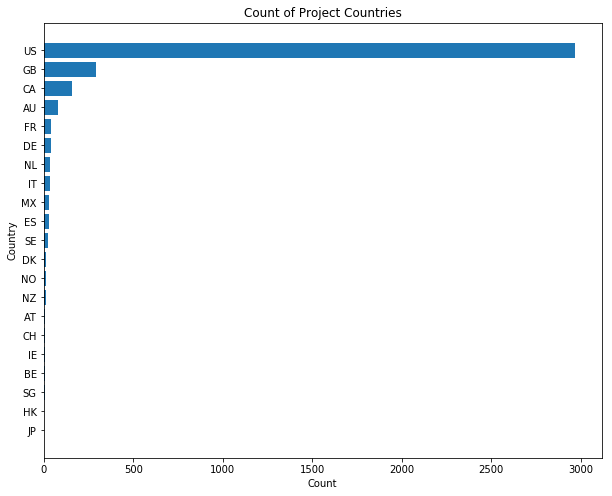

In [194]:
plt.subplots(figsize=(10,8))
countries = df.country.value_counts(ascending=True)
x=['JP', 'HK', 'SG', 'BE', 'IE','CH', 'AT', 'NZ', 'NO', 'DK', 'SE', 'ES', 'MX', 'IT', 'NL', 'DE', 'FR', 'AU', 'CA', 'GB', 'US']
plt.barh(x, width=countries)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Count of Project Countries')

As the horizontal bar graph visualizes, the vast majority of the projects were initiated in the United States, followed by Great Britain, then Canada, Australia, France, Germany, The Netherlands, Italy, Mexico, Spain, then Sweden. The rest barely register on the graph, and only had a handful (or fewer) of projects.

<b>Question 2</b></p>
Now that we have seen the location of the projects, let us go to the second question: How many projects are typically successful, meaning they have met their goal, for the month? We will use a vertical bar graph this time.

Text(0.5, 1.0, 'Count of Project Status')

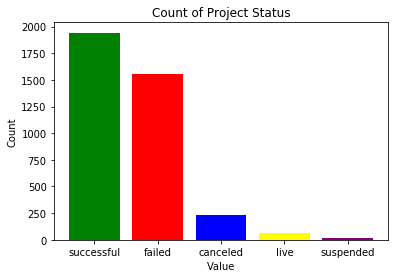

In [195]:
status = df.state.value_counts(ascending=False)
x=['successful', 'failed', 'canceled', 'live', 'suspended']
plt.bar(x, height=status, color=['green', 'red', 'blue', 'yellow', 'purple'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count of Project Status')

As the bar graph above demonstrates, more projects were successful (met their fundraising goal) than failed (did not receive enough pledges to reach their fundraising goal). It is a bit surprising that a large number do fail. That leads to the third question about how much promotional support project creators receive from the Kickstarter staff.

<b>Question 3</b></p>
To what extent were the projects promoted by the Kickstarter staff? Let us look at a subplot of two analyses, one that shows how many projects were featured as "Projects we Love" by Kickstarter. This is while the project was still live. The second shows how many were spotlighted after the project successfully met its goal, meaning it received even more promotion beyond initial fundraising to get it off the ground.

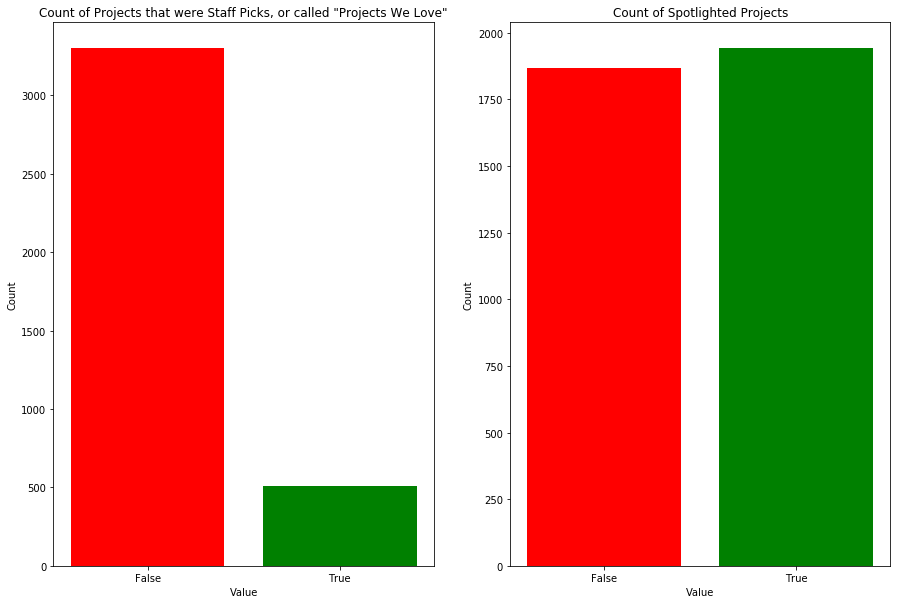

In [262]:
plt.subplots(figsize=(15, 10))

staffpick = df.staff_pick.value_counts().sort_index()
plt.subplot(1, 2, 1)
x=['False', 'True']
plt.bar(x, height=staffpick, color=['red', 'green'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count of Projects that were Staff Picks, or called "Projects We Love"')

spotlight = df.spotlight.value_counts().sort_index()
x=['False', 'True']
plt.subplot(1, 2, 2)
plt.bar(x, height=spotlight, color=['red', 'green'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count of Spotlighted Projects')
plt.show()

The bar graph on the left above demonstrates that very vew, around 500, projects were promoted as "Projects We Love" by the staff on the Kickstarter platform. With over 1500 failed projects, it seems the staff could have promoted more projects while they were live.

The bar graph on the right above visualizes that almost over half of the projects were spotlighted by staff, showing that if the project is successful (meaning it has met its goal), the Kickstarter staff do promote it so it can have a life after it has reached its fundraising goal on the platform.

<b>Question 4</b></p>
Now let's look at the performance of the projects. This next question asks, How many backers does a project attract? We will need to look at the distribution of the backers per project. Since there are so many, let us look at just the top 50.

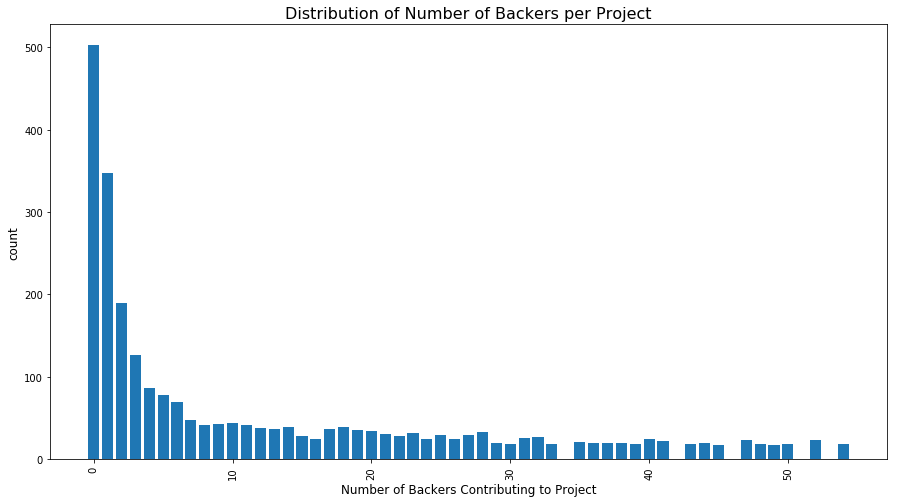

In [160]:
backers = df['backers_count'].value_counts().head(50)
plt.figure(figsize=(15,8))
plt.bar(backers.index, backers.values)
plt.xticks(rotation='vertical')
plt.xlabel('Number of Backers Contributing to Project', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title("Distribution of Number of Backers per Project", fontsize=16)
plt.show()

As you can see from the graph above, the number of backers per project is negatively skewed, with just over 500 projects receiving absolutely no (0) backers. Then the next highest is only 1 backer, then 2, and the data has a long tail. It looks like many of the projects receive under 100 total backers.

<b>Question 5</b></p>
For the last question, How do the number of backers, the goal amount, and pledged amount compare?, let us look at a series of subplots.

The first subplot visualizes a histogram of the the 50 top projects' goal amount and the 50 top projects' pledged amount. The 50 top projects were chosen because the data for each variable have many 0's, and this gives us a sense of the larger projects on the Kickstarter site.

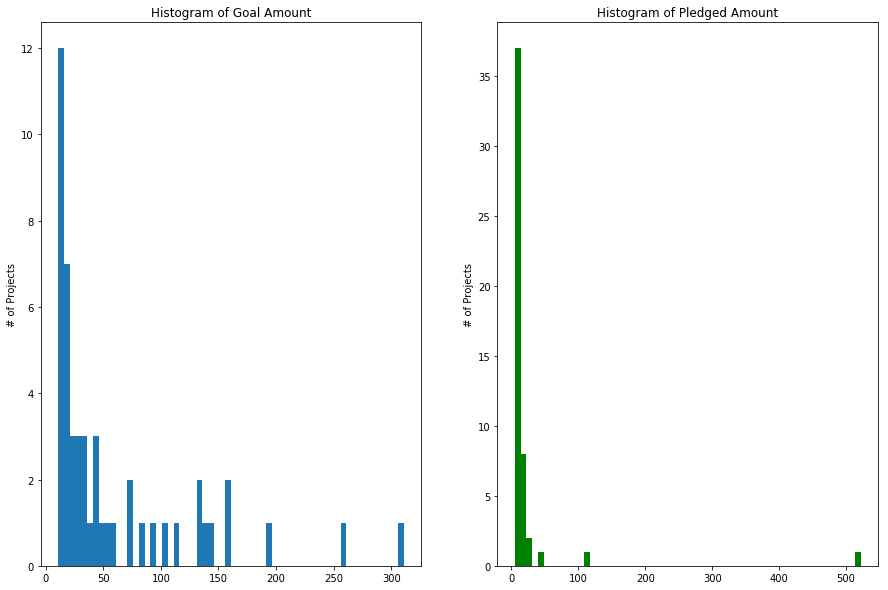

In [261]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
x = df['goal'].value_counts().head(50)
plt.hist(x, bins=60)
plt.ylabel('# of Projects')
plt.title('Histogram of Goal Amount')

y = df['converted_pledged_amount'].value_counts().head(50)
plt.subplot(1, 2, 2)
plt.hist(y, color='green', bins=60)
plt.ylabel('# of Projects')
plt.title('Histogram of Pledged Amount')
plt.show()

The histogram on the left above shows that, of the top 50 projects, the majority had goals set under 50USD. Then the goal amounts were in pretty even intervals, with one being a bi over 300USD. On the right, we can see that the majority of the top 50 pledged amounts fall below 50USD. There is one outlier of someone who pledged over 500USD. This can tell people creating projects on Kickstarter to be sure to create ways for people to pledge small amounts, since that is what a majority of the backers are pledging. This makes sense since it is a crowdfunding platform, after all.

Now let's look at the number of backers and the pledged amount of the top 50 projects and how their averages compare. For this analysis, a subplot of 2 boxplots will help us visualize and easily see the means, interquartile ranges, and outliers for these variables.

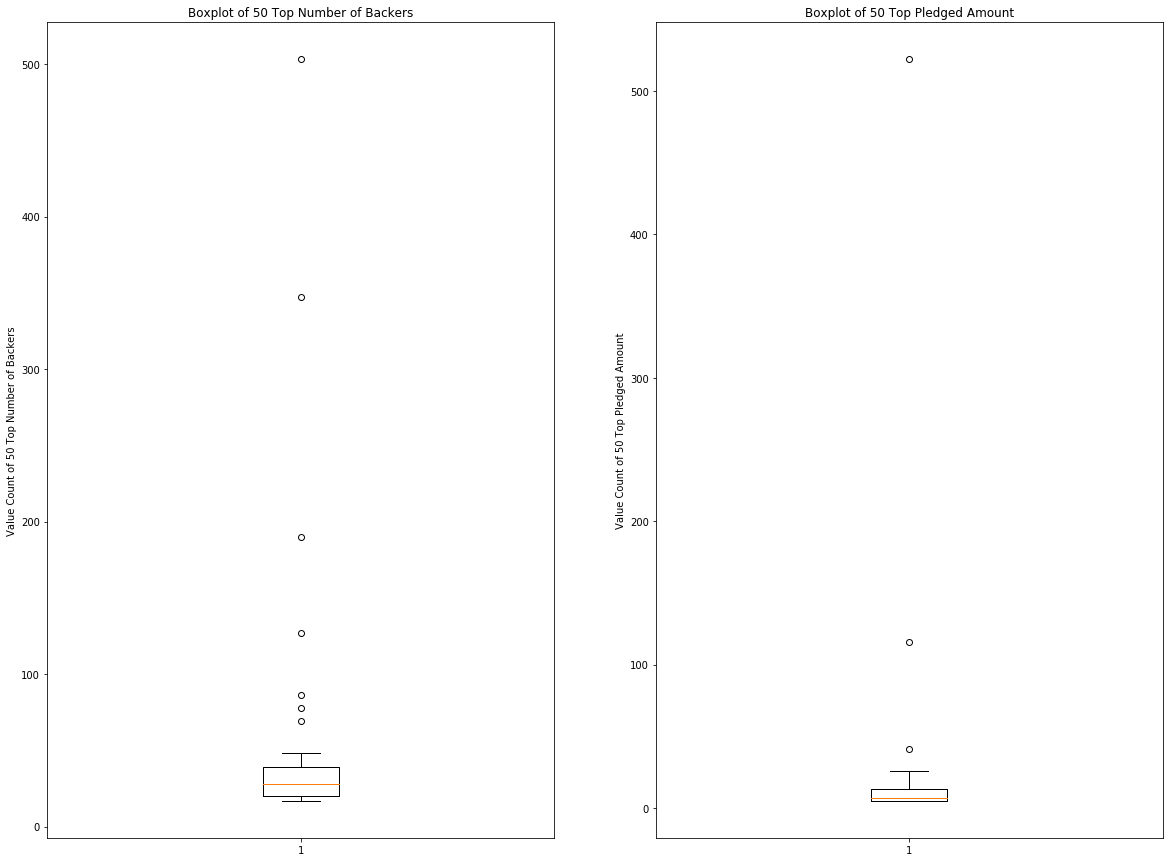

In [257]:
plt.figure(figsize=(20, 15))
x = df['backers_count'].value_counts().head(50)
plt.subplot(1, 2, 1)
plt.boxplot(x)
plt.ylabel('Value Count of 50 Top Number of Backers')
plt.title('Boxplot of 50 Top Number of Backers')

y = df['converted_pledged_amount'].value_counts().head(50)
plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.ylabel('Value Count of 50 Top Pledged Amount')
plt.title('Boxplot of 50 Top Pledged Amount')
plt.show()

For the average number of backers of the top 50 projects, the median is a bit higher than the median for the pledged amount. So there are more backers, which follows the above analyses that projects received many different backers pledging amounts under 50USD. These boxplots are also great at demonstrating outliers so we can see how dispersed the data are, and in this case we do have outliers for both variables. A few projects have a lot of backers, and a few have high-value pledges.

Finaly, let us see the type of relationship the goal amount and the pledged amount have, compared to the number of backers and the pledged amount? Is there a linear relationship for both? Again we will use only a certain part of the data since there are so many 0's due to lack of backers for so many projects. Let's increase the size to 100 for our analysis to increase the reliability a bit.

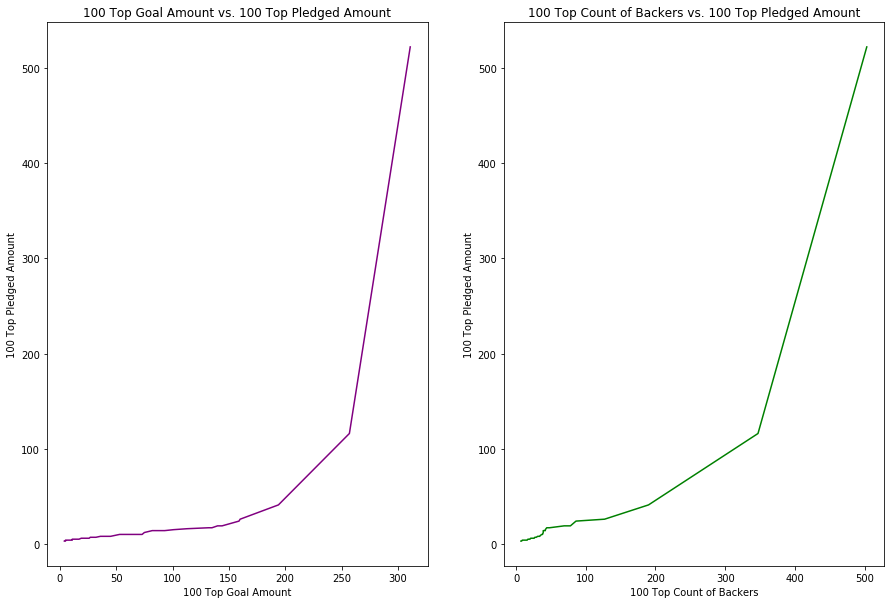

In [192]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
x = df['goal'].value_counts().head(100)
y = df['converted_pledged_amount'].value_counts().head(100)
plt.plot(x, y, color='purple')
plt.xlabel('100 Top Goal Amount')
plt.ylabel('100 Top Pledged Amount')
plt.title('100 Top Goal Amount vs. 100 Top Pledged Amount')

plt.subplot(1, 2, 2)
x = df['backers_count'].value_counts().head(100)
y = df['converted_pledged_amount'].value_counts().head(100)
plt.plot(x, y, color='green')
plt.xlabel('100 Top Count of Backers')
plt.ylabel('100 Top Pledged Amount')
plt.title('100 Top Count of Backers vs. 100 Top Pledged Amount')
plt.show()

Both graphs follow a similar pattern that goes up and to the right, with a dramatic increase at 250USD goal amount and over 350 backers, respectively. There seems to be some tipping point there. It seems more backers and a larger goal has a positive relationship to the pledged amount for the top 100 projects for this month.

In conclusion, this report demonstrates that there are a good number of pojects that were successful on the Kickstarter platform for the month of mid-November to mid-December, 2018, most of which based in the U.S. It was also surprising that there is a high number of failed projects; but not so suprising upon viewing the distribution of the number of backers with the highest level being 0 backers. The report also showed that some of the projects received promotion while they were live, and even more projects after they were successful. The goal, pledge level, and backers variables are highly dispered with a lot of 0's in the data. Visualizing the top levels of these data showed that there are outliers, but there is a consistent story that this is indeed a crowdfunding platform - many of the projects had pledges with small amounts and multiple backers, with positive relationships between the goal amount and pledge amount and number of backers and pledged amount. So this is a great site for crowdfunding a project; perhaps the staff could show more projects some love.

It would be useful to know more from this data, and I suggest future research could look at some predictive relationships/models to see if the success of a project can be predicted by its number of backers, staff promotion, location, and goal amount, using regression. 

Roxann Allen